<img src="titanic_intro.jpg" alt="titanic intro" style="width:800px;height:400px;">

<h1 style="text-align:center; font-size:35.0px">Titanic Survivability Prediction Using Machine Learning</h1>

<span style='font-family:Sabon;font-size:24.0pt;'>
    <b>Table of Contents</b>
</span>
<span style='font-family:Sabon;font-size:16.0pt;line-height:1.5'>
    <ul>        
        <li><a href='#intro'>1. Introduction</a></li>
        <li><a href='#libraries'>2. Import Libraries</a></li>
        <li><a href='#func'>3. Define Functions</a></li>
        <li><a href='#import_data'>4. Import Data</a></li>
        <li><a href='#gen_info'>5. General Information</a></li>        
        <ul>
            <li><a href='#gen_breakdown'>5.1 Data Columns Breakdown</a></li>
            <li><a href='#gen_overview'>5.2 Dataset Overview</a></li>
            <li><a href='#gen_conc'>5.3 Conclusion</a></li>
        </ul>
        <li><a href='#pp'>6. Preparing Data for Analysis</a></li>
        <ul>
            <li><a href='#pp_dup'>6.1 Check for Duplicates</a></li>
            <li><a href='#pp_colname'>6.2 Column Name Transformation</a></li>
            <li><a href='#pp_gender'>6.3 Gender Encoding</a></li>
            <li><a href='#pp_ageround'>6.4 Round Age</a></li>
            <li><a href='#pp_nameparse'>6.5 Processing the Name Column</a></li>
            <li><a href='#pp_rem_emb'>6.6 Remove Embarked Column</a></li>
            <li><a href='#pp_family'>6.7 Combine sibsp and parch</a></li>
            <li><a href='#pp_na'>6.6 Checking for Missing Values</a></li>
            <ul>
                <li><a href='#pp_nacabin'>6.6.1 Filling Missing Cabin Data</a></li>
                <li><a href='#pp_nafare'>6.6.2 Filling Fare Missing Values</a></li>
                <li><a href='#pp_naage_ml'>6.6.3 Fill Age Missing Values Using Machine Learning</a></li>
            </ul>
            <li><a href='#pp_agegroups'>6.7 Create Age Groups</a></li>
            <li><a href='#pp_conc'>6.8 Conclusion</a></li>
        </ul>
        <li><a href='#feat_vis'>7. Feature Visualization</a></li>
        <ul>
            <li><a href='#feat_conc'>7.1 Conclusion</a></li>
        </ul>
        <li><a href='#predict'>8. Creating the Survivability Model</a></li>
            <ul>
                <li><a href='#pred_multico'>8.1 Checking for Multicollinearity</a></li>
                <li><a href='#pred_test'>8.2 Test Classification Algorithms</a></li>
                <li><a href='#pred_tune'>8.3 Algorithm Tuning</a></li>
                <li><a href='#pred_cv'>8.4 Grid Search with Cross Validation</a></li>
                <li><a href='#pred_finalmodel'>8.5 Finalizing the Model</a></li>
                <li><a href='#pred_conc'>8.6 Conclusion</a></li>
            </ul>    
        <li><a href='#survival_pred'>9. Predict Survivability</a></li>
            <ul>
                <li><a href='#survival_prep'>9.1 Prepare Data</a></li>
                <li><a href='#survival_prediction'>9.2 Prediction</a></li>
                <li><a href='#survival_acc'>9.2 Prediction Accuracy</a></li>
            </ul>
        <li><a href='#final_conc'>10. Final Conclusion</a></li>
    </ul>
</span>

<h2>Disclaimer</h2>

<span style='font-family:sabon;font-size:13pt;'>
  <b>The following work includes datasets from a <a href='https://www.kaggle.com/c/titanic/'>Kaggle.com competition</a>
  </b>
  <br>
  <br> The data is available via the competition page. <br>
  <br>
</span>

<a id="intro"></a>
<h2>Introduction</h2>

<span style='font-family:sabon;font-size:13pt;'> On April 15, 1912, during her maiden voyage from Southampton, UK, to New York City, the RMS Titanic encountered an iceberg which resulted in the superliner sinking. <br> Of the crew and passengers aboard, more than 1,500 lives were lost. <br>
  <br> In this work, we are provided with a dataset full with information about passengers who were on board the titanic as it sank. <br> We are tasked with determining which passengers survived and which ones did not. <br> To do this we will be transforming the data in order to be able to predict survivability via machine learning algorithms. </span>

<a id="libraries"></a>
<h2>Import Libraries</h2>

In [46]:
#!pip install sidetable

In [47]:
#!pip install nameparser

In [48]:
import pandas as pd
import numpy as np
import math
import warnings
import sidetable as stb
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from nameparser import HumanName

#sklearn models
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

#sklearn splitting tool
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

#sklearn metrics
from sklearn.metrics import \
    accuracy_score, precision_score, recall_score,\
    f1_score, roc_auc_score, mean_absolute_percentage_error,\
    mean_absolute_error, mean_squared_error, r2_score, auc, roc_curve

<a id="func"></a>
<h2>Define Functions</h2>

In [49]:
def sample_display(df_list,n=5):
    """
    This function displays samples
    of all the dataframes in the list.
    n rows default 5
        
    Parameters:
    
        df_list: list of pandas dataframes
    
        n (int): number of sample rows to return
        
    Returns:
    
        n sample rows from each df listed
    
    """
    alias= 0   
    for df in df_list:
        
    #replace n if df has less than n rows
        if df.shape[0] < n:
            n = df.shape[0]
        
        try:
            df_name = df.custom_name
        except:
            df_name = 'Unknown Dataframe {}'.format(alias)
            alias += 1
        print('{} Sample:'.format(df_name.title()))
        display(df.sample(n))
        
def zn_values(df):
    """
    This function accepts a dataframe 
    and produces a report of the presence
    of 0 values in each column.
    
    Parameters:
        df: the pandas dataframe which columns you want to check
    
    Returns:
        report of 0 value entries in each column
    """
    #loop over each column and count how many 0 values it contains
    for col in df.columns:
        z_values = df[df[col] == 0].shape[0]

        print('Column name: {}\nValues that equal 0: {}\n'.format(
            col,z_values
        )
             )
        
def dup_display(df_list):
    """
    This function returns the
    number of duplicated rows
    in each df in the list
        
    Parameters:
        df_list: list of pandas dataframes
    
    Returns:
        report of duplicated rows in each df listed
        report of duplicates diversity in each df listed
    
    """
    alias= 0
    for df in df_list:
        dup_sum = df.duplicated().sum()
        dup_perc = dup_sum / df.shape[0]
        try:
            df_name = df.custom_name
        except:
            df_name = 'Unknown Dataframe {}'.format(alias)
            alias += 1
        
        print('{} :\nDuplicated Values: {}\n% duplicated rows: {:.2%}\n'.format(
            df_name,dup_sum,dup_perc
        )
             )
        print('Duplicates distribution diversity:')
        for col in df[df.duplicated()].columns:
            print('{} : {}'.format(
                col,df[df.duplicated()][col].nunique()
        )
             )
        print()
def val_counts(df_list, drop_na= True, n=5):
    
    """
    This function returns a dataframe's 
    column values and their value counts
    in absolute and relative values

    Parameters:
        df_list(list): a list of one or more dataframes.
                       Columns should be specified for
                       the columns which value counts you need.
        n (int): number of rows to report for each column. (Default = 5)
    Returns:
        A report of the first highest n value counts(absolute and relative) in each specified column
        for each df in the df_list.

    """
    for df in df_list:
        try:
            df_name = df.custom_name
        except:
            df_name = 'Dataframe {}'.format(df_list.index(df))
        print('Top {} Value Counts for {} :\n'.format(n,df_name))
        for column in df.columns:
            print('\nColumn: {}'.format(column))
            val_normalized = df[column].value_counts(normalize=True, dropna= drop_na).to_frame()
            val_absolute = df[column].value_counts(dropna= drop_na).to_frame()
            val_final = val_absolute.merge(val_normalized, right_index=True, left_index=True)
            val_final.columns = ['{}'.format(column+' '+'absolute'),'{}'.format(column+' '+'relative')]
            display(val_final.head(n))
            
def metric_calc(metric_name, y_test, predictions=None, proba=None):
    """
    This function returns the result
    of a metric calculation held in
    its function dictionary

    Parameters:
        metric_name(str): 
            a string that corresponds to
            one of the keys in the function dictionary
            
        y_test (pandas series): 
            array of target variable test data
        
        predictions (numpy.ndarray):
            result of prediction of test data
        
        proba (numpy.ndarray):
            results of probability prediction of test data
    Returns:
        Result of metric calculation

    """
    function_dict = dict(accuracy= 'Accuracy: {:.2f}'.format(accuracy_score(y_test,predictions)),
                        percision = 'Percision: {:.2f}'.format(precision_score(y_test,predictions)),
                        recall = 'Recall: {:.2f}'.format(recall_score(y_test,predictions)),
                         F1 = 'F1 Score: {:.2f}'.format(f1_score(y_test, predictions)), 
                        )
    if metric_name == 'ROC_AUC':
        return(print('ROC AUC: {:.2f}'.format(roc_auc_score(y_test, proba))))
    return(print(function_dict[metric_name]))

def classification_prediction(
    m,
    X_train,
    X_test,
    y_train,
    y_test,
    class_metrics= dict(
        accuracy=True, percision= True, recall= True, F1= True
        ),
    proba_metrics = False
    ):
    """
    This function trains classification models
    and prints out a report of metrics
    and feature importance ranking

    Parameters:
        m(list): 
            a list of models to train
        
        X_train(pandas series):
            array of features
            
        X_test(pandas series):
            array of features for testing
        
        y_test (pandas series): 
            array of target variable test data
        
        class_metrics (dict):
            dictionary of classification metrics to calculate
        
        proba_metrics (bool):
            if True, probability prediction will be calculated
            
    Returns:
        report of model efficiency using classification metrics.
        report of feature importance.

    """
    #train model and predict
    for model in m:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        #print report
        print('Model: {}\n'.format(model.__class__.__name__))
        for key,value in class_metrics.items():
            if value == True and type(model) in [type(LogisticRegression()),type(RandomForestClassifier()),type(DecisionTreeClassifier()),type(GradientBoostingClassifier())]:
                metric_calc(key, y_test, predictions)
                
        if proba_metrics == True:
            probabilities = model.predict_proba(X_test)[:,1]
            metric_calc('ROC_AUC', y_test,predictions, proba=probabilities)
            
        #display feature importance dataframe
        if type(model) in [type(RandomForestClassifier()),type(DecisionTreeClassifier()), type(GradientBoostingClassifier())]:
            importances = model.feature_importances_
            imp_df = pd.DataFrame(
                data=pd.Series(importances).values, index= X.columns, columns= ['importance']
                )
            imp_df.sort_values('importance', ascending=False, inplace=True)
            display(imp_df.head())
            
        elif type(model) in [type(LogisticRegression())]:
            feature_weights  = model.coef_
            weight_0 = model.intercept_
            imp_df = pd.DataFrame(data=pd.Series(feature_weights[0]).values, index= X.columns, columns= ['importance'])
            imp_df = abs(imp_df).sort_values('importance', ascending= False)
            display(imp_df.head())
        print()
        
        #display feature importance plot
        sns.set_palette(palette= 'deep')
        fig, ax = plt.subplots(figsize=(12,10))
        imp_df.plot.bar(ax=ax)
        ax.set_title("{} Model Feature importances using MDI".format(model.__class__.__name__), fontsize= 24)
        ax.set_ylabel("Mean decrease in impurity", fontsize= 20)
        ax.set_xlabel("Feature", fontsize= 20)
        fig.tight_layout()

        #change tick labels font size
        cax = plt.gcf().axes[0]
        cax.tick_params(labelsize=16)
        
        plt.show()
        
def regression_results(models, X_train, X_test, y_train, y_test):
    """
    This function trains regression models
    and prints out a report of metrics
    and feature importance ranking

    Parameters:
        models(list): 
            a list of models to train
        
        X_train(pandas series):
            array of features
            
        X_test(pandas series):
            array of features for testing
        
        y_test (pandas series): 
            array of target variable test data
            
    Returns:
        report of model efficiency using regression metrics.
        report of feature importance.

    """
    for model in models:
        print('Model: {}\n________________________________'.format(model.__class__.__name__))
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        #deploy report of coefs
        if type(model) == type(RandomForestRegressor()):
            feature_weights = model.feature_importances_
            imp_df = pd.DataFrame(data = pd.Series(feature_weights).values, index= X.columns, columns = ['importance'])
            imp_df = abs(imp_df).sort_values('importance', ascending= False)
            display(imp_df.head(10))
        else:
            feature_weights  = model.coef_
            weight_0 = model.intercept_
            imp_df = pd.DataFrame(data=pd.Series(feature_weights).values, index= X.columns, columns= ['importance'])
            imp_df = abs(imp_df).sort_values('importance', ascending= False)
            display(imp_df.head(10))
        print('MAE: {:.2f}'.format(mean_absolute_error(y_test, predictions)))
        print('MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test, predictions)))
        print('MSE: {:.2f}'.format(mean_squared_error(y_test, predictions)))
        print('RMSE: {:.2f}'.format(math.sqrt(mean_squared_error(y_test, predictions))))
        print('R2: {:.2f}'.format(r2_score(y_test, predictions)))
    #display feature importance plot
        sns.set_palette(palette= 'deep')
        fig, ax = plt.subplots(figsize=(12,10))
        imp_df.plot.bar(ax=ax)
        ax.set_title("{} Model Feature importances using MDI".format(model.__class__.__name__), fontsize= 24)
        ax.set_ylabel("Mean decrease in impurity", fontsize= 20)
        ax.set_xlabel("Feature", fontsize= 20)
        fig.tight_layout()
        
        #change tick labels font size
        cax = plt.gcf().axes[0]
        cax.tick_params(labelsize=16)
        
        plt.show()
        
def percentile_report(series, percentile=[1, 5, 95, 99]):
    """
    Prints a report of the percentiles defined in
    the percentile argument for a given series.
    
    Parameters:
        series(pd.Series): a pandas array
        percentile(list): a list of percentiles to report upon
    Returns:
        A report of values by percentiles.
    """
    print(series.name, 'Percentile Report:\n\n')
    print('Minimum value: {}'.format(series.min()))
    for perc in percentile:
        print('{} Percentile: {}'.format(perc, np.percentile(series, perc)))
        print('___________________________________')
        print('\n')
    print('Maximum value: {}'.format(series.max()))
    
def rebuild_oh_cols(target_df, df, encode):
    """
    Adds a column with 0 or 1 values to a dataframe for every
    missing column of target_df in df.
    Useful for matching different sets of train data or test data.
    
    Parameters: 
        target_df (Pandas DataFrame):
            dataframe with the columns to match
        df (Pandas DataFrame):
            dataframe to be returned with added columns
        encode (int(0,1)):
            value to be inserted into each row of new columns
    Returns:
        updated df
    """
    if encode not in (0,1):
        raise ValueError("encode is a binary argument that only takes the values 0 or 1")
    cols_to_rebuild = target_df.columns[~(target_df.columns.isin(df.columns))]
    for col in cols_to_rebuild:
        df[col] = encode
    return(df)

def parse_title(row):
    """
    Uses the nameparser library
    to extract title honorifics from names
    in a dataframe.
    
    Parameters:
        row: row to be fed into the apply() function
    Returns:
        title part of the name string
        
    """
    name = row['name']
    title = HumanName(name).title
    return(title)

def transform_title(row):
    """
    transforms uncommon or empty titles to
    Mr or Miss for gender 0 and 1 respectively.
    
    parameters:
        row: row to pull using the apply() method
        
    returns:
        transformed title as string
    """
    title_list = ['Mr.', 'Mrs.', 'Miss.', 'Master.']
    title = row['title']
    gender = row['sex']
    if title in title_list:
        return(title)
    elif gender == 0:
        return('Miss.')
    else:
        return('Mr.')
    
def spread_df(df, one_hot_encode):
    """
    one hot encode columns and return df
    
    parameters:
        df: 
            dataframe whose columns to encode
        one_hot_encode (list):
            list of column names to encode
            
    returns:
        dataframe with encoded columns
    """
    return(pd.get_dummies(df, columns= one_hot_encode))

<a id="import_data"></a>
<h2>Import Data</h2>

In [50]:
#load test and train data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.custom_name = 'train data'
test_data.custom_name = 'test data'

<a id="gen_info"></a>
<h2>General Information</h2>

<a id='gen_breakdown'></a>
<h3>Data Columns Breakdown</h3>

<span style='font-family:sabon;font-size:13pt;'>
  <b>The dataset contains the following fields:</b>
  <br>
  <br>
  <b>Survived</b> — the fact of survival for the passenger. <br>
  <b>pclass</b> — Ticket class: 1 = Upper, 2 = Middle, 3 = Lower. <br>
  <b>sibsp</b> — # of siblings / spouses aboard the Titanic <br>
  <b>parch</b> — # of parents / children aboard the Titanic <br>
  <b>Phone</b> — whether the user provided their phone number. <br>
  <b>Age</b> - Passenger age. <br>
  <b>ticket</b> — Ticket number <br>
  <b>fare</b> — Passenger fare <br>
  <b>cabin</b> — Cabin number <br>
  <b>embarked</b> — Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton <br>
  <b>sex</b> — Passenger gender. <br>
</span>

<a id="gen_overview"></a>
<h3>Dataset Overview</h3>

In [51]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [52]:
val_counts([train_data])

Top 5 Value Counts for train data :


Column: PassengerId


,PassengerId absolute,PassengerId relative
1,1,0.001122
599,1,0.001122
588,1,0.001122
589,1,0.001122
590,1,0.001122



Column: Survived


,Survived absolute,Survived relative
0,549,0.616162
1,342,0.383838



Column: Pclass


,Pclass absolute,Pclass relative
3,491,0.551066
1,216,0.242424
2,184,0.206510



Column: Name


,Name absolute,Name relative
"Braund, Mr. Owen Harris",1,0.001122
"Boulos, Mr. Hanna",1,0.001122
"Frolicher-Stehli, Mr. Maxmillian",1,0.001122
"Gilinski, Mr. Eliezer",1,0.001122
"Murdlin, Mr. Joseph",1,0.001122



Column: Sex


,Sex absolute,Sex relative
male,577,0.647587
female,314,0.352413



Column: Age


,Age absolute,Age relative
24.0,30,0.042017
22.0,27,0.037815
18.0,26,0.036415
19.0,25,0.035014
28.0,25,0.035014



Column: SibSp


,SibSp absolute,SibSp relative
0,608,0.682379
1,209,0.234568
2,28,0.031425
4,18,0.020202
3,16,0.017957



Column: Parch


,Parch absolute,Parch relative
0,678,0.760943
1,118,0.132435
2,80,0.089787
5,5,0.005612
3,5,0.005612



Column: Ticket


,Ticket absolute,Ticket relative
347082,7,0.007856
CA. 2343,7,0.007856
1601,7,0.007856
3101295,6,0.006734
CA 2144,6,0.006734



Column: Fare


,Fare absolute,Fare relative
8.0500,43,0.048260
13.0000,42,0.047138
7.8958,38,0.042649
7.7500,34,0.038159
26.0000,31,0.034792



Column: Cabin


,Cabin absolute,Cabin relative
B96 B98,4,0.019608
G6,4,0.019608
C23 C25 C27,4,0.019608
C22 C26,3,0.014706
F33,3,0.014706



Column: Embarked


,Embarked absolute,Embarked relative
S,644,0.724409
C,168,0.188976
Q,77,0.086614


<a id='gen_conc'></a>
<h3>Conclusion</h3>

<span style='font-family:sabon;font-size:13pt;'>
  <ul>
    <li>Survival rate in the train data is 62%</li>
    <li>Over 50% of passengers had 3rd class tickets, 20% had 2nd class tickets, and 24% had 1st class tickets.</li>
    <li>65% passengers are male, whle 35% are female.</li>
    <li>Ages range from 0.4 to 80 With an average of ~30.</li>
    <li>Most passengers did not have siblings or spouses with them on the Titanic.</li>
    <li>Most passengers did not have children / their parents with them on the Titanic.</li>
    <li>Most passengers embarked from Southampton.</li>
  </ul>
</span>

<a id='pp'></a>
<h3>Preparing Data for Analysis</h3>

<a id='pp_dup'></a>
<h3>Check for Duplicates</h3>

In [53]:
#produce duplicates report
dup_display([train_data, test_data])

train data :
Duplicated Values: 0
% duplicated rows: 0.00%

Duplicates distribution diversity:
PassengerId : 0
Survived : 0
Pclass : 0
Name : 0
Sex : 0
Age : 0
SibSp : 0
Parch : 0
Ticket : 0
Fare : 0
Cabin : 0
Embarked : 0

test data :
Duplicated Values: 0
% duplicated rows: 0.00%

Duplicates distribution diversity:
PassengerId : 0
Pclass : 0
Name : 0
Sex : 0
Age : 0
SibSp : 0
Parch : 0
Ticket : 0
Fare : 0
Cabin : 0
Embarked : 0



<a id='pp_colname'></a>
<h3>Column Name Transformation</h3>

In [54]:
#transform column names to lowercase
for df in [train_data, test_data]:
    df.columns = df.columns.str.lower()

<a id='pp_gender'></a>
<h3>Gender Encoding</h3>

<span style='font-family:sabon;font-size:13pt;'> We'll use binary encoding for the genders. </span>

In [55]:
#encode values
train_data['sex'] = train_data['sex'].apply(lambda x: 1 if x == 'male' else 0)
test_data['sex'] = test_data['sex'].apply(lambda x: 1 if x == 'male' else 0)

<a id='pp_ageround'></a>
<h3>Round Age</h3>

In [56]:
#round up ages
train_data['age'] = np.ceil(train_data['age'])
test_data['age'] = np.ceil(test_data['age'])

<a id='pp_nameparse'></a>
<h3>Processing the Name Column</h3>

<span style='font-family:sabon;font-size:13pt;'> We'll use the NameParser library to parse the passenger names for their titles. <br>
</span>

In [57]:
#test the parser
for i, row in train_data[['name']].head(5).iterrows():
    name = HumanName(row['name'])
    print(name.title)

Mr.
Mrs.
Miss.
Mrs.
Mr.


<span style='font-family:sabon;font-size:13pt;'> great! it seems to work well for our data. <br> Let's implement it across the board. </span>

In [58]:
#create title column containing the titles
train_data['title'] = train_data.apply(parse_title, axis=1)
test_data['title'] = test_data.apply(parse_title, axis=1)

In [59]:
for df in [train_data, test_data]:
    fig= px.histogram(df,
                      x='title',
                     title = 'Title distribution in {}'.format(df.custom_name),
                      color_discrete_sequence = ['#be1558']
                     )
    fig.update_layout(
        font=dict(
            family="Arial",
            size=16
            )
    )

    fig.update_yaxes(
        showgrid=False
    )
    fig.update_xaxes(showgrid=False,
                    categoryorder= 'total descending')
    
    fig.show()

<span style='font-family:sabon;font-size:13pt;'> Let's take a look at the values the function could not parse </span>

In [60]:
display(train_data[train_data['title'] == ''],test_data[test_data['title'] == ''])

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
30,31,0,1,"Uruchurtu, Don. Manuel E",1,40.0,0,0,PC 17601,27.7208,NaN,C,
449,450,1,1,"Peuchen, Major. Arthur Godfrey",1,52.0,0,0,113786,30.5000,C104,S,
536,537,0,1,"Butt, Major. Archibald Willingham",1,45.0,0,0,113050,26.5500,B38,S,
822,823,0,1,"Reuchlin, Jonkheer. John George",1,38.0,0,0,19972,0.0000,NaN,S,


,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9,C105,C,


<span style='font-family:sabon;font-size:13pt;'> so these are very uncommon titles, we will insert the title of Mr. for males and Miss (more frequent than Mrs.) for females. <br> Because most of the titles in the data are Mr., Mrs., Miss, and Master; we will transform all other titles in the same way: Mr. for males and Miss for females. </span>

In [61]:
#transform titles
train_data['title'] = train_data.apply(transform_title, axis=1).str.lower()

test_data['title'] = test_data.apply(transform_title, axis=1).str.lower()

In [62]:
#plot new distribution
for df in [train_data, test_data]:
    fig= px.histogram(df,
                      x='title',
                     title = 'Title distribution in {}'.format(df.custom_name),
                      color_discrete_sequence = ['#be1558']
                     )
    fig.update_layout(
        font=dict(
            family="Arial",
            size=16
            )
    )

    fig.update_yaxes(
        showgrid=False
    )
    fig.update_xaxes(showgrid=False,
                    categoryorder= 'total descending')
    
    fig.show()

<span style='font-family:sabon;font-size:13pt;'> Finally we'll remove the Sex column as it is no longer necessary </span>

In [63]:
#drop sex column
train_data.drop('sex', axis=1, inplace=True)
test_data.drop('sex', axis=1, inplace=True)

<a id='pp_rem_emb'></a>
<h3>Remove Embarked Column</h3>

This column's values shouldn't have an impact on survivability.<br>
we will remove it.

In [64]:
train_data = train_data.drop('embarked', axis = 1)
test_data = test_data.drop('embarked', axis = 1)

<a id='pp_family'></a>
<h3>Combine Sibsp and Parch</h3>

These columns indicate family relations of the passengers.<br>
We'll combine these into one column to indicate family size.

In [65]:
train_data['family'] = train_data['sibsp'] + train_data['parch']
test_data['family'] = test_data['sibsp'] + test_data['parch']

train_data = train_data.drop(['sibsp', 'parch'], axis= 1)
test_data = test_data.drop(['sibsp', 'parch'], axis= 1)

<a id='pp_na'></a>
<h3>Checking for Missing Values</h3>

In [66]:
train_data.stb.missing(style=True)

,missing,total,percent
cabin,687,891,77.10%
age,177,891,19.87%
passengerid,0,891,0.00%
survived,0,891,0.00%
pclass,0,891,0.00%
name,0,891,0.00%
ticket,0,891,0.00%
fare,0,891,0.00%
title,0,891,0.00%
family,0,891,0.00%


In [67]:
test_data.stb.missing(style=True)

,missing,total,percent
cabin,327,418,78.23%
age,86,418,20.57%
fare,1,418,0.24%
passengerid,0,418,0.00%
pclass,0,418,0.00%
name,0,418,0.00%
ticket,0,418,0.00%
title,0,418,0.00%
family,0,418,0.00%


<a id='pp_nacabin'></a>
<h4>Filling Missing Cabin Data</h4>

<span style='font-family:sabon;font-size:13pt;'>
It would be hard to fill cabin data with predictions or mode() as it would skew our results and ultimately make the column useless.<br>
In this case we will preserve the data we have and define the missing cabin data as "NA".<br>
Afterwhich we'll extract the cabin location identifier from each entry.
</span>

In [68]:
#fill missing cabin data with NA and extract cabin identifier
train_data['cabin'] = train_data['cabin'].apply(lambda x: 'NA' if pd.isnull(x)  else x[0])
test_data['cabin'] = test_data['cabin'].apply(lambda x: 'NA' if pd.isnull(x)  else x[0])

In [69]:
display(train_data['cabin'].sort_values().unique(), test_data['cabin'].sort_values().unique())

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'NA', 'T'], dtype=object)

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'NA'], dtype=object)

<span style='font-family:sabon;font-size:13pt;'>
We have an extra value in the train data named "T".<br>
let's take a look at that
</span>

In [70]:
train_data[train_data['cabin'] == 'T']

,passengerid,survived,pclass,name,age,ticket,fare,cabin,title,family
339,340,0,1,"Blackwell, Mr. Stephen Weart",45.0,113784,35.5,T,mr.,0


<span style='font-family:sabon;font-size:13pt;'>
There is a lone entry for cabin T.<br>
We will transform it to NA to make the data coherent with the test data.
</span>

In [71]:
#change cabin T to NA
train_data.loc[train_data['cabin'] == 'T', 'cabin'] = 'NA'

<a id='pp_nafare'></a>
<h4>Filling Fare Missing Values</h4>

<span style='font-family:sabon;font-size:13pt;'> for the test data we will fill the fare with the mean fare </span>

In [72]:
#fill missing values with the mean
test_data.loc[test_data['fare'].isna(), 'fare'] = test_data['fare'].mean()

In [73]:
#round fare
train_data['fare'] = train_data['fare'].astype(int)
test_data['fare'] = test_data['fare'].astype(int)

<a id='pp_naage_ml'></a>
<h4>Fill Age Missing Values Using Machine Learning</h4>

<span style='font-family:sabon;font-size:13pt;'> We will use both data sets to train an algorithm and predict the missing age values. <br> Then we will implement the prediction. </span>

<h5>Correlation and One-Hot Encoding</h5>

<span style='font-family:sabon;font-size:13pt;'> We'll examine correlation of the data features after we encode the relevant columns. <br> We will detect multicollinearity between features and select the best ones to train our algorithm with. </span>

In [74]:
#join data together
full_data = pd.concat([train_data.drop('survived', axis=1), test_data])

In [75]:
#create correlation data
encode_columns= [
    'pclass',
    'title', 
    'cabin',
    'family'
    ]
#one hot encode relevant columns
one_hot_corr = spread_df(
    full_data.drop(['passengerid','name','ticket'], axis=1),
    one_hot_encode = encode_columns
)

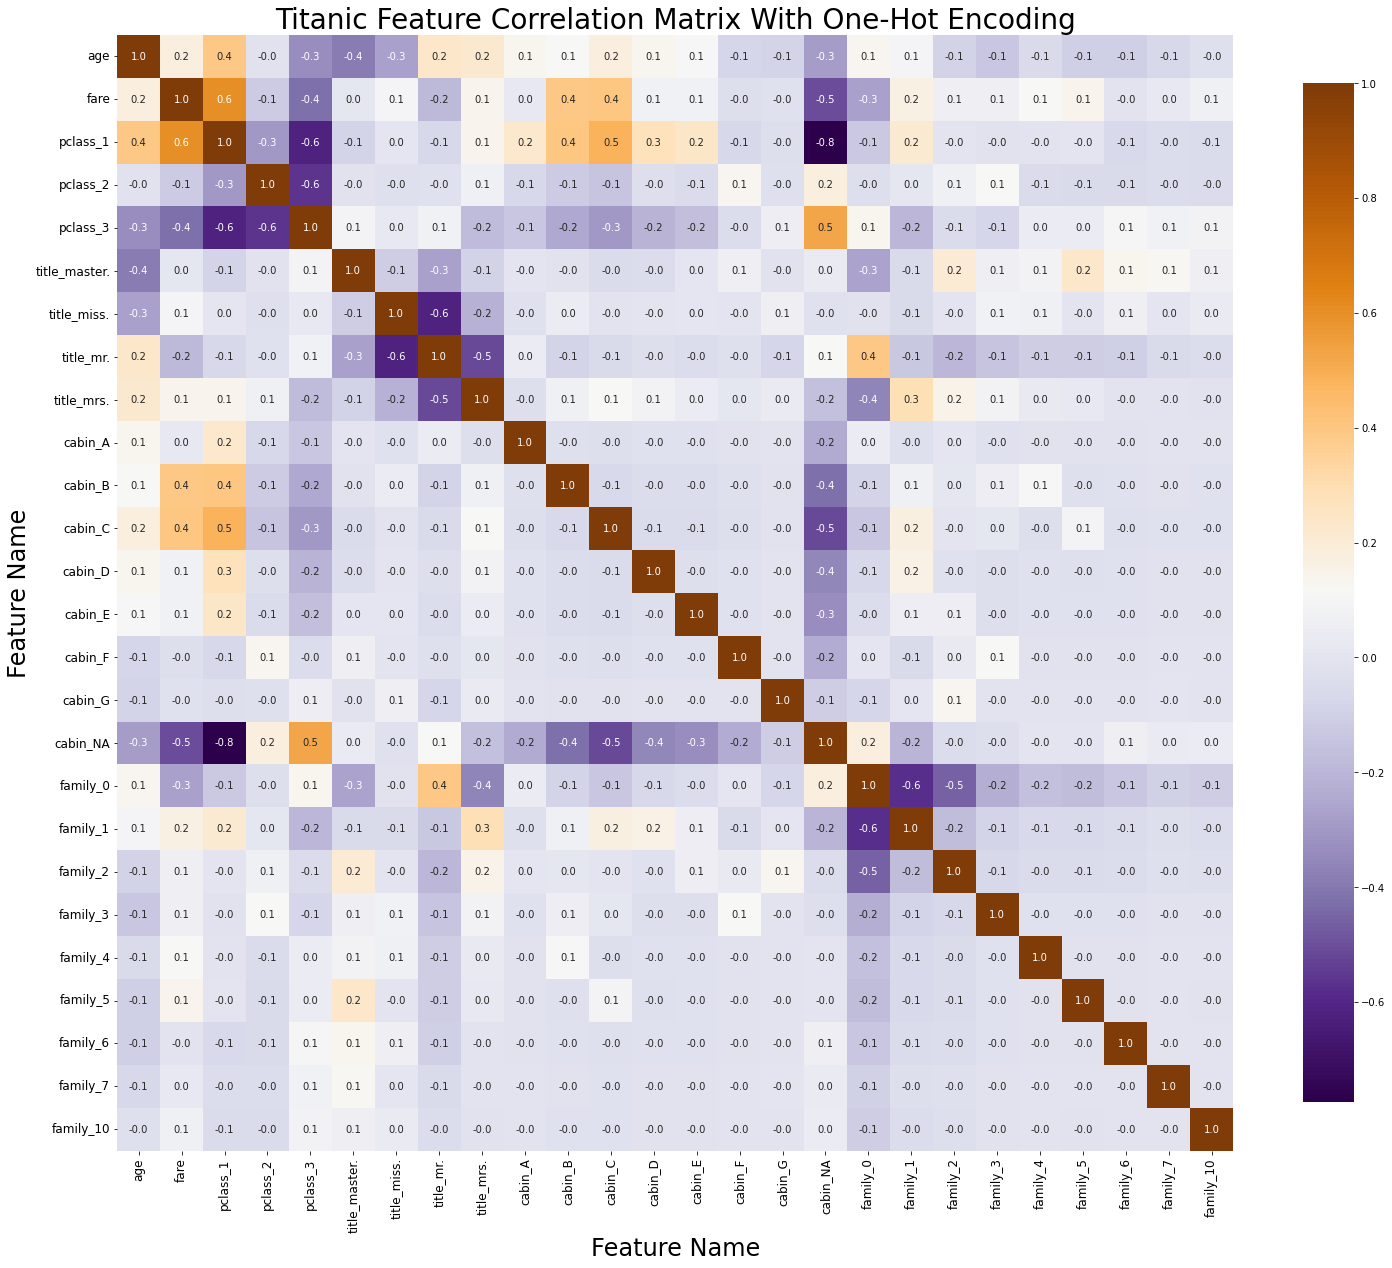

In [76]:
#produce heatmap for correlation
heatmap_corr = one_hot_corr.corr()
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(
    data= heatmap_corr,
    annot=True,
    square=True,
    fmt= '.1f',
    cbar_kws={"shrink": 0.75},
    cmap='PuOr_r').set_title('Titanic Feature Correlation Matrix With One-Hot Encoding', fontsize=28)

#change tick labels font size
cax = plt.gcf().axes[0]
cax.tick_params(labelsize=12)

#set axes label
plt.xlabel("Feature Name", fontsize = 24)
plt.ylabel("Feature Name", fontsize = 24)

plt.show()

<span style='font-family:sabon;font-size:13pt;'>
  <b>Results: <br>
  </b><br>
    We will remove the following columns: Cabin_NA, pclass_2
</span>

<h4>Preparing the Data</h4>

In [77]:
#define columns to remove due to multicollinearity
multico = ['cabin_NA', 'pclass_2']

In [78]:
#ML Set with all one encoded columns
ML_dataset = one_hot_corr.dropna().copy()

In [79]:
#define Training set without multico columns
X = ML_dataset.drop(multico, axis=1).drop('age', axis=1)

#define testing set
y = ML_dataset['age']

#split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

#scale data
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

<h4>Testing Regression Models</h4>

Model: LinearRegression
________________________________


,importance
pclass_1,4.552697
title_master.,4.406061
title_mrs.,2.741167
title_miss.,2.574667
pclass_3,2.070302
title_mr.,2.069351
family_3,1.264050
cabin_C,1.111057
family_0,0.905907
cabin_G,0.743786


MAE: 8.46
MAPE: 0.64
MSE: 115.73
RMSE: 10.76
R2: 0.46


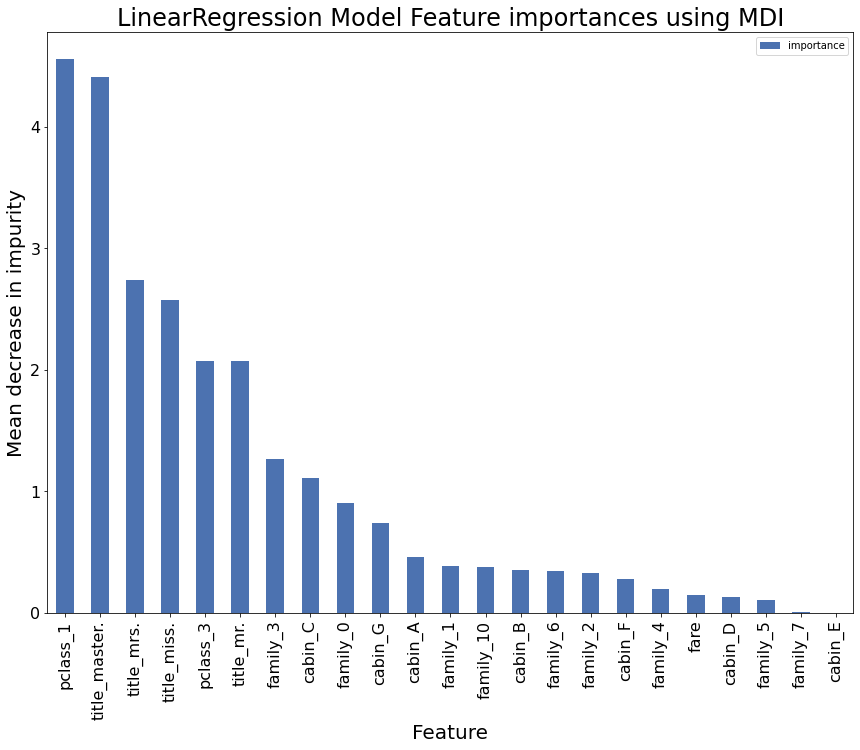

Model: RandomForestRegressor
________________________________


,importance
fare,0.271753
title_master.,0.200704
pclass_1,0.159522
title_miss.,0.131853
family_0,0.049265
pclass_3,0.028451
family_1,0.020503
title_mr.,0.018428
title_mrs.,0.018295
cabin_C,0.016238


MAE: 8.22
MAPE: 0.43
MSE: 121.22
RMSE: 11.01
R2: 0.43


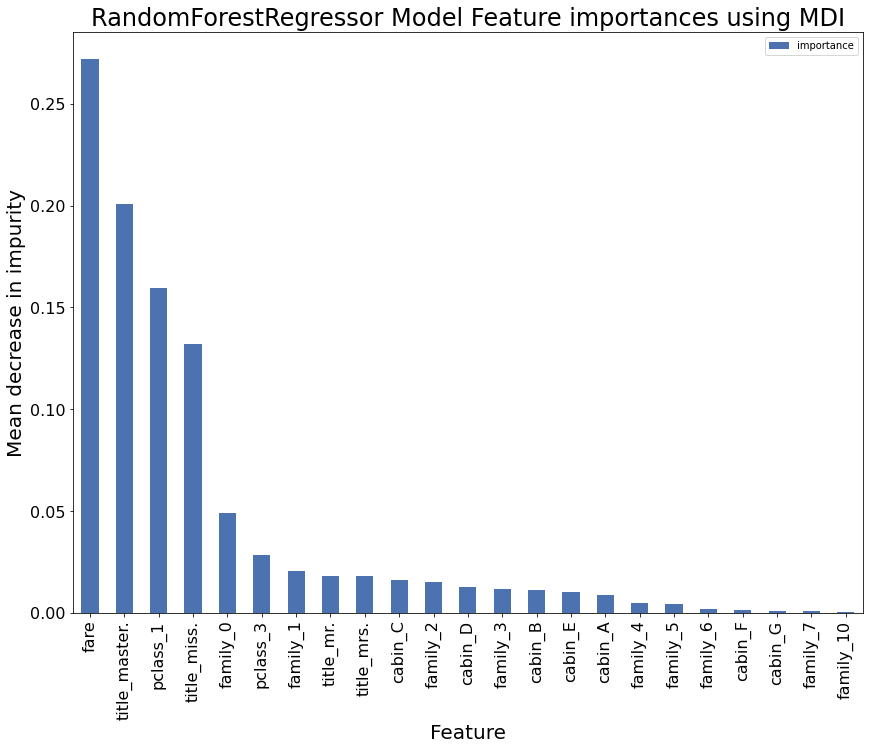

Model: Lasso
________________________________


,importance
title_master.,4.653917
title_miss.,3.404937
pclass_1,3.363746
pclass_3,1.474836
family_3,0.396925
family_0,0.191950
title_mrs.,0.020701
fare,0.000000
family_7,0.000000
family_6,0.000000


MAE: 8.91
MAPE: 0.82
MSE: 124.67
RMSE: 11.17
R2: 0.42


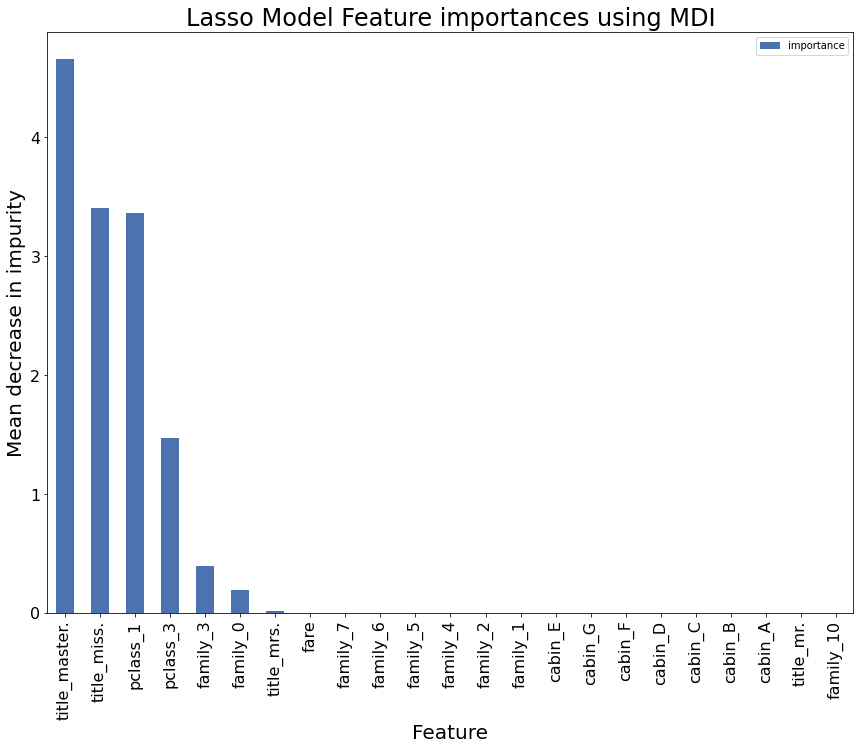

In [80]:
#define models for testing
models= [LinearRegression(), RandomForestRegressor(random_state= 42, n_estimators= 2000), Lasso(random_state= 42)]

#train models and showcase results
regression_results(models,X_train_st, X_test_st, y_train, y_test)

<span style='font-family:sabon;font-size:13pt;'>
  <b>Results:</b>
  <br> For this analysis we will use the Random Forest Regressor.<br> We will finalize the model and use it to predict the missing age values. </span>

<h4>Finalize Random Forest Regressor Model</h4>

In [81]:
#define Training set
X = ML_dataset.drop(multico, axis=1).drop('age',axis=1)

#define testing set
y = ML_dataset['age']

#split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

#scale data
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

#train model
rf_model = RandomForestRegressor(random_state = 42, n_estimators= 2000)
rf_model.fit(X_train_st, y_train)

RandomForestRegressor(n_estimators=2000, random_state=42)

<h4>Prepare Data for Prediction</h4>

<span style='font-family:sabon;font-size:13pt;'> In order to transform the datasets into something our model can work with, we'll have to make sure our dataframes contain all the feature columns. </span>

In [82]:
#fetch data where Age is missing
train_data_predict = train_data[train_data['age'].isna()].drop('age', axis=1)
test_data_predict = test_data[test_data['age'].isna()].drop('age', axis=1)

In [83]:
#define columns to encode
to_one_hot = ['pclass', 'title','family', 'cabin']
#one hot encode datasets and drop multicollinear columns
train_data_predict = spread_df(train_data_predict, to_one_hot).drop(multico, axis=1)
test_data_predict = spread_df(test_data_predict, to_one_hot).drop(multico, axis=1)

#drop irrelevant columns
train_data_predict = train_data_predict.drop(['passengerid', 'name', 'ticket', 'survived'], axis= 1)
test_data_predict = test_data_predict.drop(['passengerid', 'name', 'ticket'], axis= 1)

In [84]:
#build one hot columns that exist in X but not in the general dataset
for df in [train_data_predict,test_data_predict]:
    rebuild_oh_cols(target_df = X, df=df, encode= 0)

<span style='font-family:sabon;font-size:13pt;'> Great! We're ready to predict the Age values. </span>

<h4>Predict Missing Values</h4>

In [85]:
#scale new data with our scaler
train_data_predict = scaler.transform(train_data_predict)
test_data_predict = scaler.transform(test_data_predict)

In [86]:
#predict missing ages for each dataset and round up
train_data_age_prediction = np.ceil(rf_model.predict(train_data_predict))
test_data_age_prediction = np.ceil(rf_model.predict(test_data_predict))

In [87]:
#define new df for comparison
clean_train_data = train_data.copy()
clean_test_data = test_data.copy()

#implement prediction
clean_train_data.loc[train_data['age'].isna(), 'age'] = train_data_age_prediction
clean_test_data.loc[test_data['age'].isna(), 'age'] = test_data_age_prediction

<a id='pp_agegroups'></a>
<h3>Create Age Groups</h3>

<span style='font-family:sabon;font-size:13pt;'> We'll split the ages into groups, to make one hot encoding the age feature easier </span>

In [88]:
#split age into groups
clean_test_data['age_group'] = pd.cut(
        x=clean_test_data['age'],
        bins=[0,16,30,45,100],
        labels=["0-15","16-30","31-45", "46-100"]
    )
clean_train_data['age_group'] = pd.cut(
        x=clean_train_data['age'],
        bins=[0,16,30,45,100],
        labels=["0-15","16-30","31-45", "46-100"]
    )

<a id='pp_conc'></a>
<h3>Conclusion</h3>

<span style='font-family:sabon;font-size:13pt;'>
    We examined the data more closely and found several issues that needed addressing before we could proceed.
    <ul>
    <li>The age, cabin, embarked, and fare columns contained missing values.</li>
        <li>We replaced the missing values, and predicted missing ages using the Random Forest Regression algorithm.</li>
        <li>We split the Cabin and Age column into groups.</li>
    </ul>
</span>

<a id='feat_vis'></a>
<h2>Feature Visualization</h2>

In [89]:
#remove irrelevant columns
clean_train_data = clean_train_data.drop(['passengerid','name','ticket', 'age'],axis=1)
clean_test_data = clean_test_data.drop(['passengerid','name','ticket', 'age'],axis=1)

#define name for reference
clean_train_data.custom_name = 'Cleaned Train Data'
clean_test_data.custom_name = 'Cleaned Test Data'

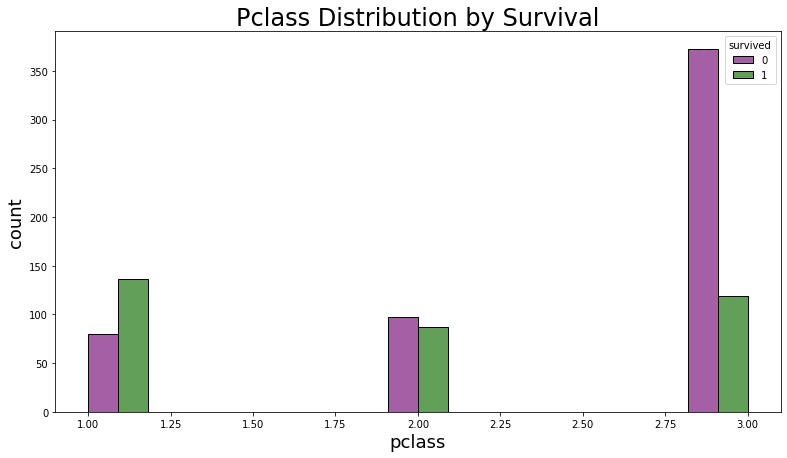

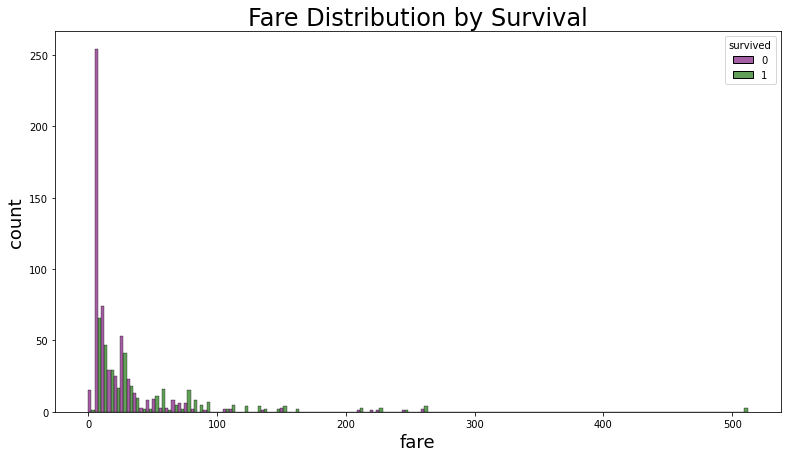

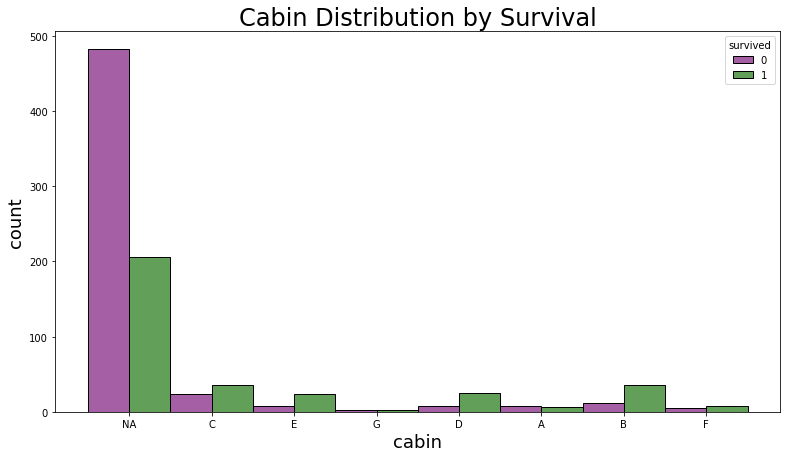

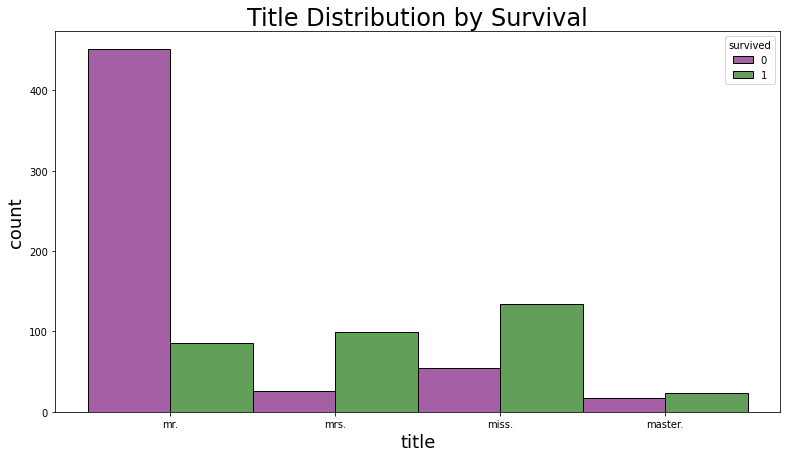

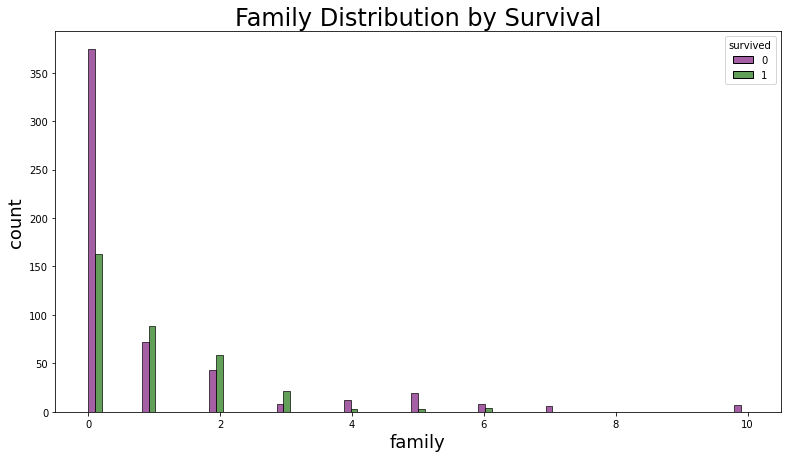

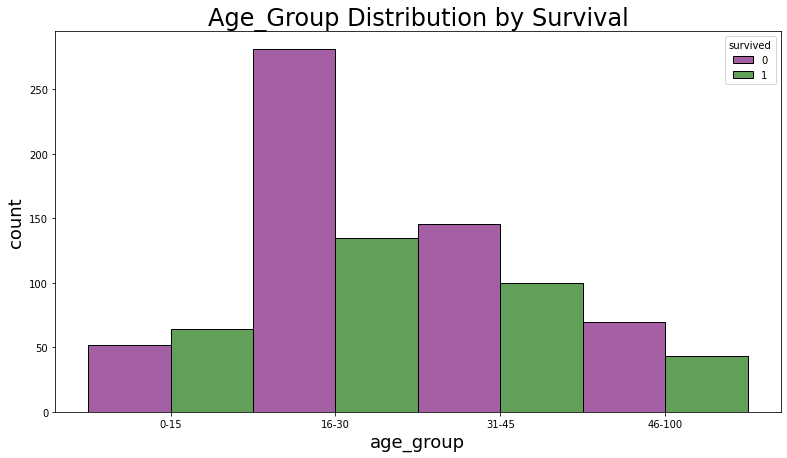

In [90]:
#plot each feature distribution vs survival
palette = ["#872A86", "#2E8121"]

sns.set_palette(palette=palette)
for col in clean_train_data.drop('survived', axis=1).columns:
    fig, ax = plt.subplots(figsize=(13,7))
    sns.histplot(
        x=col,
        data=clean_train_data,
        hue='survived',
        multiple='dodge'
    ).set_title(f'{col.title()} Distribution by Survival', fontsize= 24)
    plt.xlabel(xlabel= col, fontsize=18)
    plt.ylabel(ylabel= 'count', fontsize=18)
    plt.show()

<a id='feat_conc'></a>
<h3>Conclusion</h3>

<span style='font-family:sabon;font-size:13pt;'> The initial training data suggests various trends: <br>
  <br>
  <b>Pclass</b>: <br> 3rd class seems to have the highest survival discrepency, with most 3rd class ticket passengers having not survived. <br>
  <br>
  <b>Family</b>: <br> Passengers who were not alone on the Titanic seems to have had a better chance of survival. <br>
  <br>
  <b>Fare</b>: <br> Passengers who paid a low fare have a high mortality rate, this is in line with the ticket class results. <br>
  <br>
  <b>Cabin</b>: <br> Seems that cabin C may have had a better survival chance than the other cabins. <br>
  <br>
  <b>Title</b>: <br> Passengers with the title Mrs, Miss had the best survival rates. This is in line with the Sex results. <br>
  <br>
  <br> In order to find which features affect the survivability, we will train and test multiple classification machine learning algorithms. </span>

<a id='predict'></a>
<h2>Creating the Survivability Model</h2>

<a id='pred_multico'></a>
<h3>Checking for Multicollinearity</h3>

<h4>Prepare the Data</h4>

In [91]:
#encode columns
survive_train_onehot = spread_df(
    clean_train_data,
    one_hot_encode= [
        'pclass',
        'family',
        'title', 
        'cabin', 
        'age_group'
    ]
)

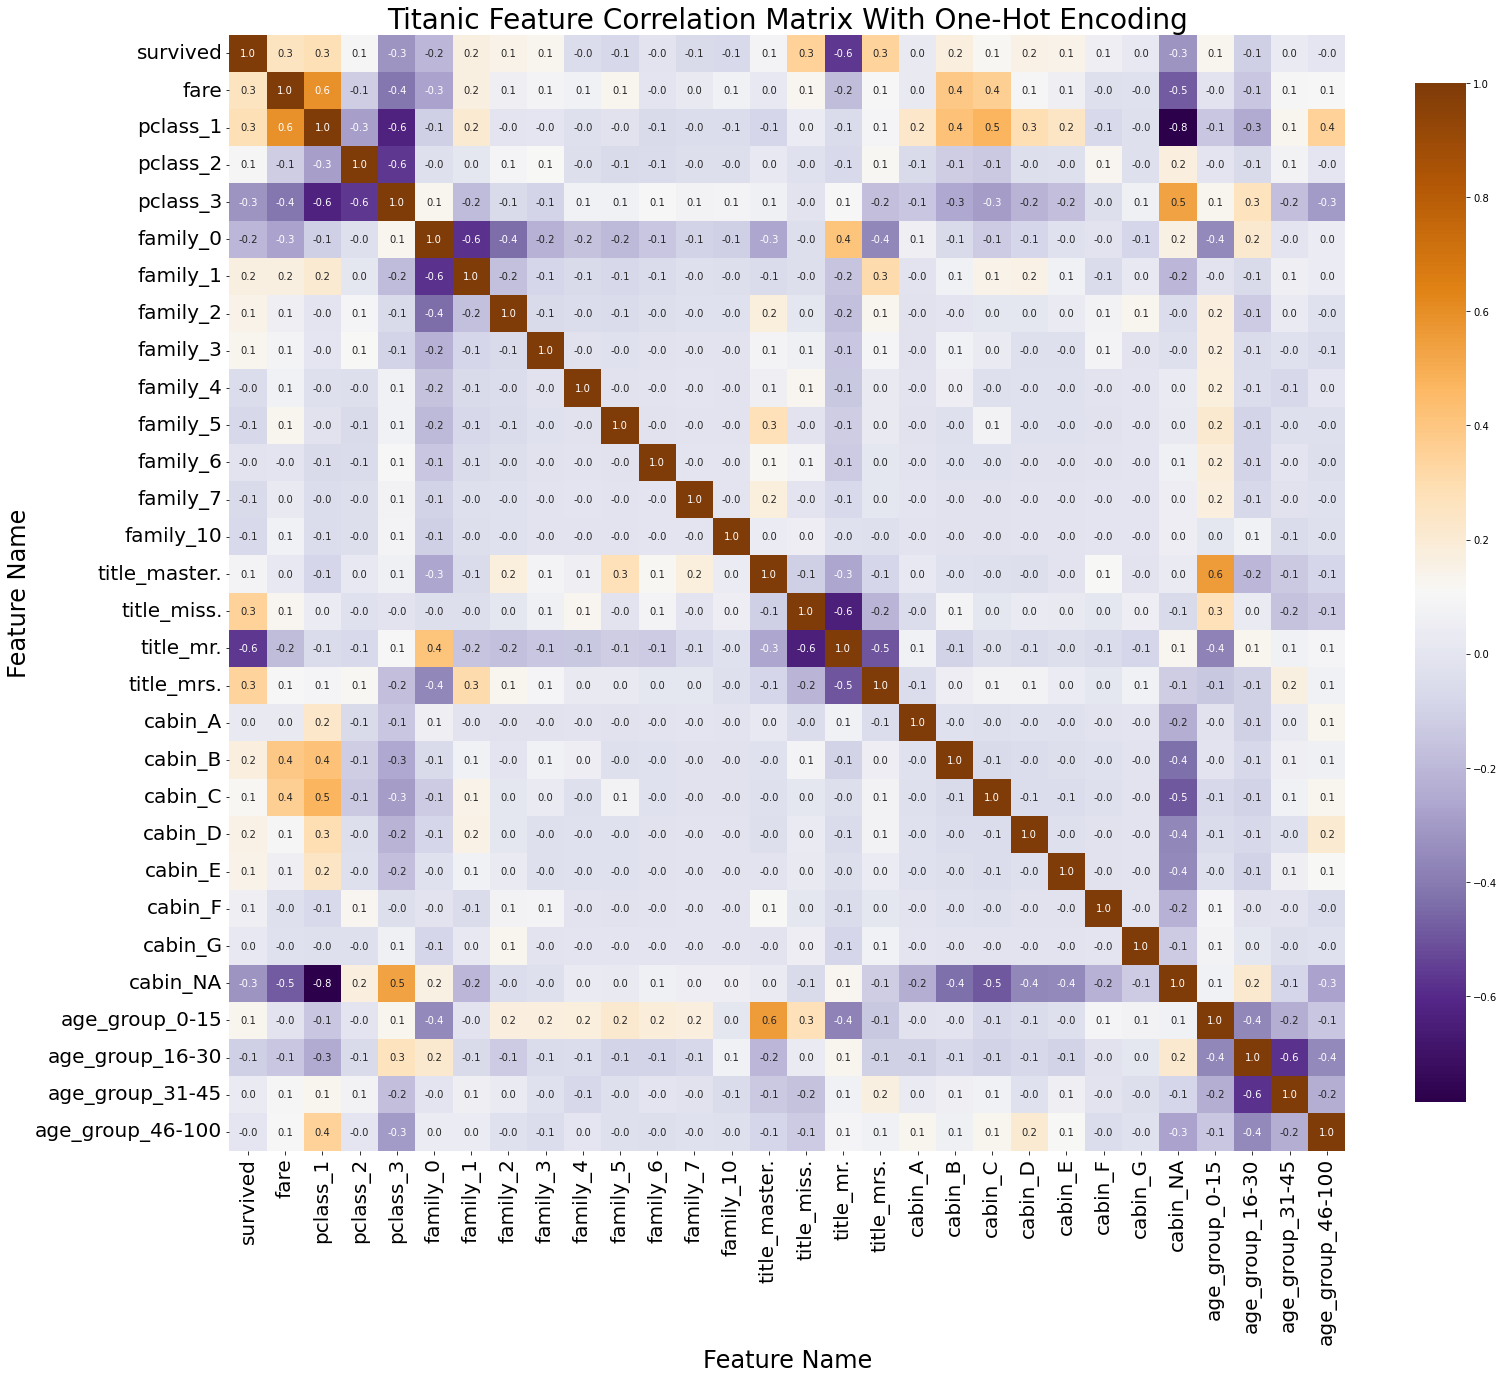

In [92]:
#produce correlation matrix using pearson correlation
corr_matrix = survive_train_onehot.corr()

ax, fig = plt.subplots(figsize=(25,25))
sns.heatmap(
    data= corr_matrix,
    annot = True,
    square = True,
    cmap='PuOr_r',
    fmt= '.1f',
    cbar_kws={"shrink": 0.75}
).set_title('Titanic Feature Correlation Matrix With One-Hot Encoding', fontsize=28)

#change tick labels font size
cax = plt.gcf().axes[0]
cax.tick_params(labelsize=20)

#set axes label
plt.xlabel("Feature Name", fontsize = 24)
plt.ylabel("Feature Name", fontsize = 24)
plt.show()

<h4>Remove Multicollinear Columns</h4>

In [93]:
#remove columns with multicollinearity
survive_train_onehot.drop(['cabin_NA','pclass_2'], axis=1, inplace=True)

<a id='pred_test'></a>
<h3>Test Classification Algorithms</h3>

In [94]:
#define Training set
X = survive_train_onehot.drop('survived', axis=1)

#define testing set
y = survive_train_onehot['survived']

#split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

#scale data
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

Model: LogisticRegression

Accuracy: 0.84
Percision: 0.76
Recall: 0.81
F1 Score: 0.78
ROC AUC: 0.90


,importance
title_mr.,0.897721
title_mrs.,0.616796
family_7,0.533713
family_10,0.508295
family_5,0.459885


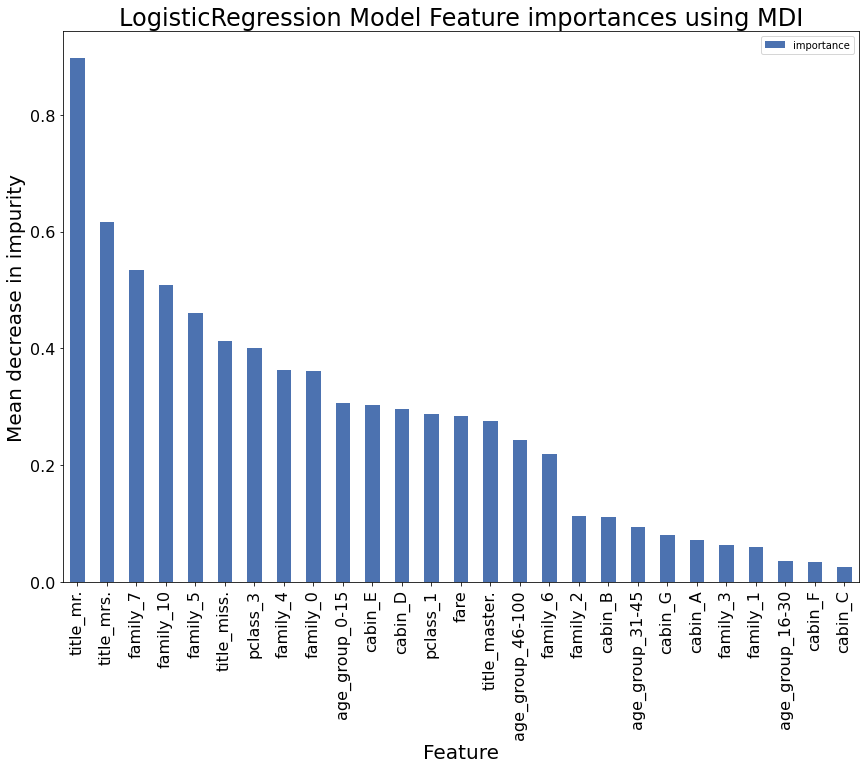

Model: RandomForestClassifier

Accuracy: 0.83
Percision: 0.75
Recall: 0.77
F1 Score: 0.76
ROC AUC: 0.92


,importance
fare,0.271773
title_mr.,0.198616
title_miss.,0.085121
pclass_3,0.070508
title_mrs.,0.058689


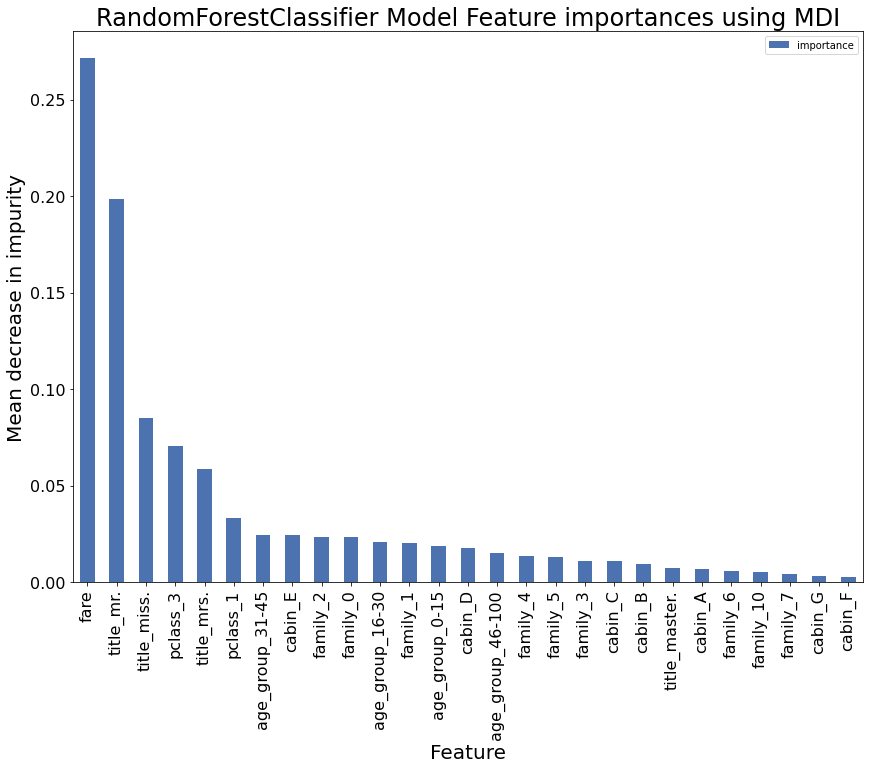

Model: DecisionTreeClassifier

Accuracy: 0.81
Percision: 0.72
Recall: 0.74
F1 Score: 0.73
ROC AUC: 0.77


,importance
title_mr.,0.376313
fare,0.266455
pclass_3,0.111885
pclass_1,0.035031
family_2,0.026114


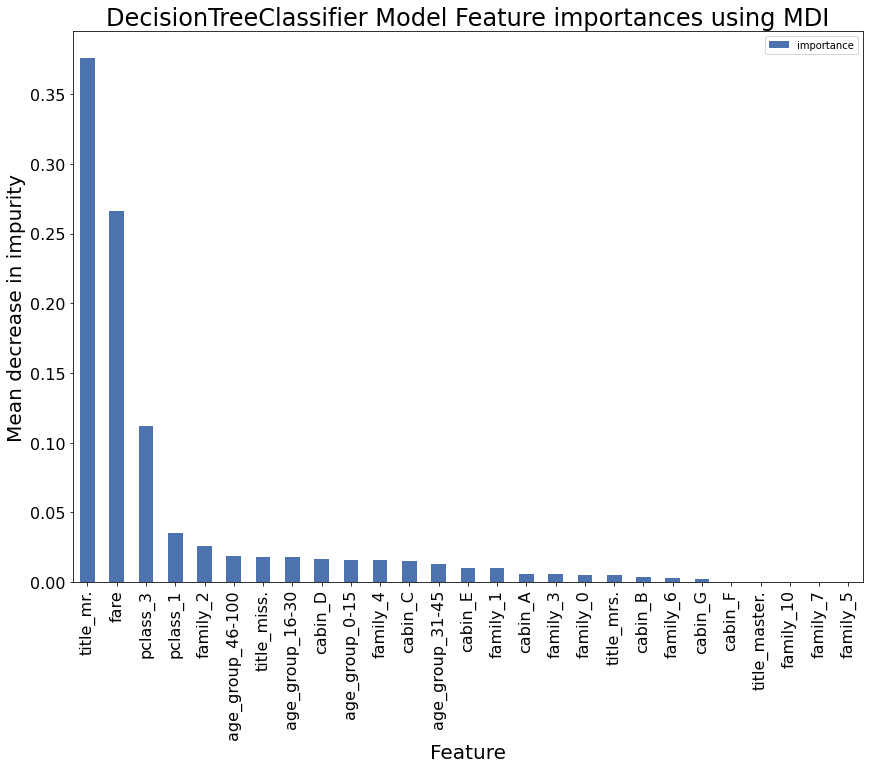

Model: GradientBoostingClassifier

Accuracy: 0.84
Percision: 0.75
Recall: 0.81
F1 Score: 0.78
ROC AUC: 0.92


,importance
title_mr.,0.498708
fare,0.197486
pclass_3,0.145688
pclass_1,0.043732
cabin_E,0.018934


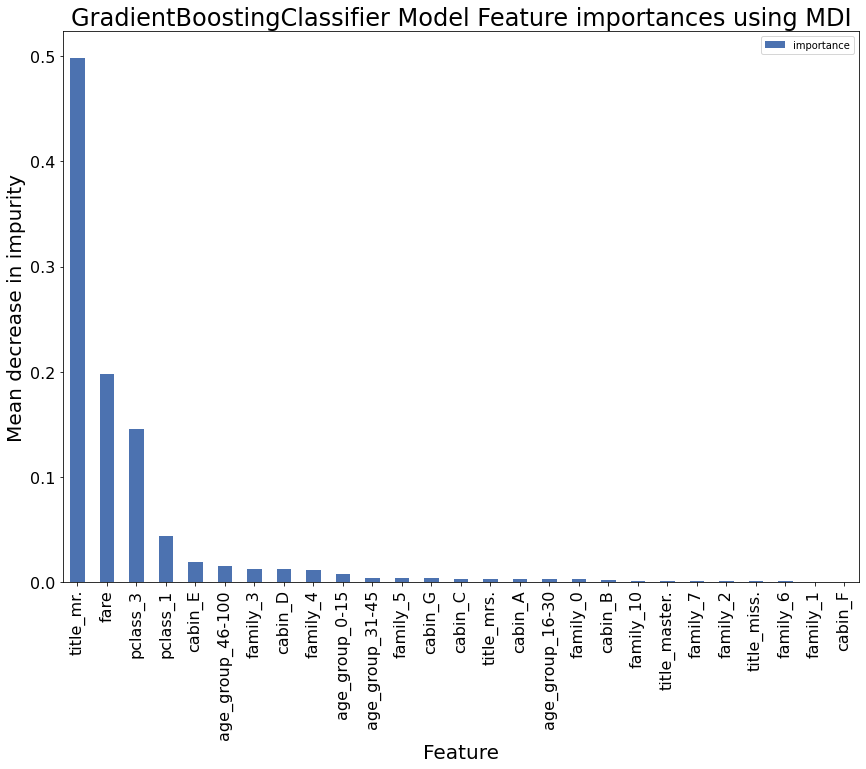

In [95]:
#define models
models= [
    LogisticRegression(random_state = 42),
    RandomForestClassifier(random_state = 42),
    DecisionTreeClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42)
]

#test models with training data
classification_prediction(models, X_train_st, X_test_st, y_train, y_test, proba_metrics= True)

<span style='font-family:sabon;font-size:13pt;'>
  <b>Results: <br>
  </b> We find that the best performing algorithm is Random Forest Classifier: <br>
  <br> Accuracy: 0.83 <br> Percision: 0.75 <br> Recall: 0.77 <br> F1 Score: 0.76 <br> ROC AUC: 0.92 <br>
  <br> The top features the model detected were Title_mr, Fare, pclass_3, pclass_1<br>
  <br> During the data visualization part, we saw these features had a big impact on survivability. <br> Seeing these at the top fills us with confidence! <br> Before we go on to predict the survivability, we will perform tuning of the model's parameters to try and increase the accuracy. </span>

<a id='pred_tune'></a>
<h3>Algorithm Tuning</h3>

<span style='font-family:sabon;font-size:13pt;'> In order to tune the algorithm we will use the randomized search from the sklearn library. <br> We'll start with a set of key parameters and assign to them a list of values. Then we'll perform cross validation to find the best combination of parameters.<br>
</span>

In [96]:
#set random state
random_state = [42]
#produce list of n trees to use
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 8)]

#set max features parameter
max_features = ['auto', 'sqrt']

#set maximum depth list, including None
max_depth = [int(x) for x in np.linspace(5, 100, num = 10)]
max_depth.append(None)

#set minimum samples split
min_samples_split = [2, 3, 5, 8]

#set minimum samples at each leaf node
min_samples_leaf = [1, 2, 3, 4, 5]

#set method of selecting samples for training each tree
bootstrap = [True, False]

#generate random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'random_state' : random_state
              }
#print resulting grid
random_grid

{'n_estimators': [200, 457, 714, 971, 1228, 1485, 1742, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 15, 26, 36, 47, 57, 68, 78, 89, 100, None],
 'min_samples_split': [2, 3, 5, 8],
 'min_samples_leaf': [1, 2, 3, 4, 5],
 'bootstrap': [True, False],
 'random_state': [42]}

In [97]:
rf = RandomForestClassifier(random_state= 42)

#search 150 combinations, using 4 fold cross validation
rf_random = RandomizedSearchCV(
    estimator = rf,
    param_distributions = random_grid,
    n_iter = 150, 
    cv = 4,
    verbose=2,
    random_state=42,
    n_jobs = -1
)

#train the model using the chosen parameters
rf_random.fit(X_train_st, y_train)

Fitting 4 folds for each of 150 candidates, totalling 600 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
                   n_iter=150, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 15, 26, 36, 47, 57, 68,
                                                      78, 89, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 5, 8],
                                        'n_estimators': [200, 457, 714, 971,
                                                         1228, 1485, 1742,
                                                         2000],
                                        'random_state': [42]},
                   random_state=42, verbose=2)

In [99]:
#show best parameters
rf_random.best_params_

{'random_state': 42,
 'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

<h4>Base Model Performance Vs Chosen Random Parameters</h4>

Model: RandomForestClassifier

Accuracy: 0.83
Percision: 0.75
Recall: 0.77
F1 Score: 0.76
ROC AUC: 0.92


,importance
fare,0.271773
title_mr.,0.198616
title_miss.,0.085121
pclass_3,0.070508
title_mrs.,0.058689


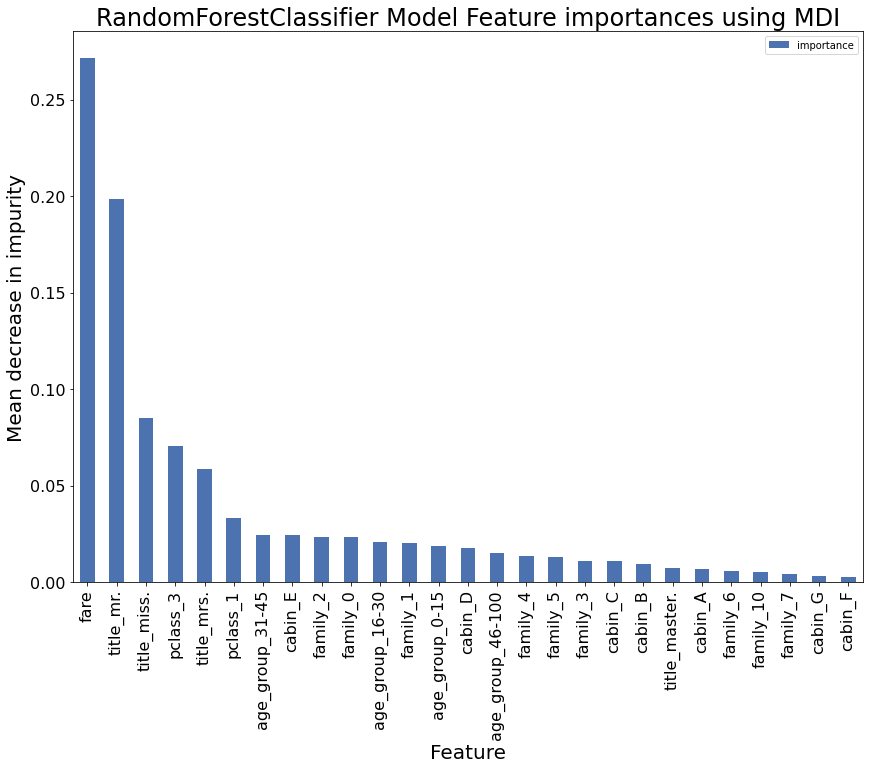

In [100]:
#run base model
base_model = RandomForestClassifier(random_state= 42)
classification_prediction([base_model], X_train_st, X_test_st, y_train, y_test, proba_metrics= True)

Model: RandomForestClassifier

Accuracy: 0.84
Percision: 0.78
Recall: 0.76
F1 Score: 0.77
ROC AUC: 0.92


,importance
title_mr.,0.303641
fare,0.135412
title_miss.,0.132242
pclass_3,0.094944
title_mrs.,0.086916


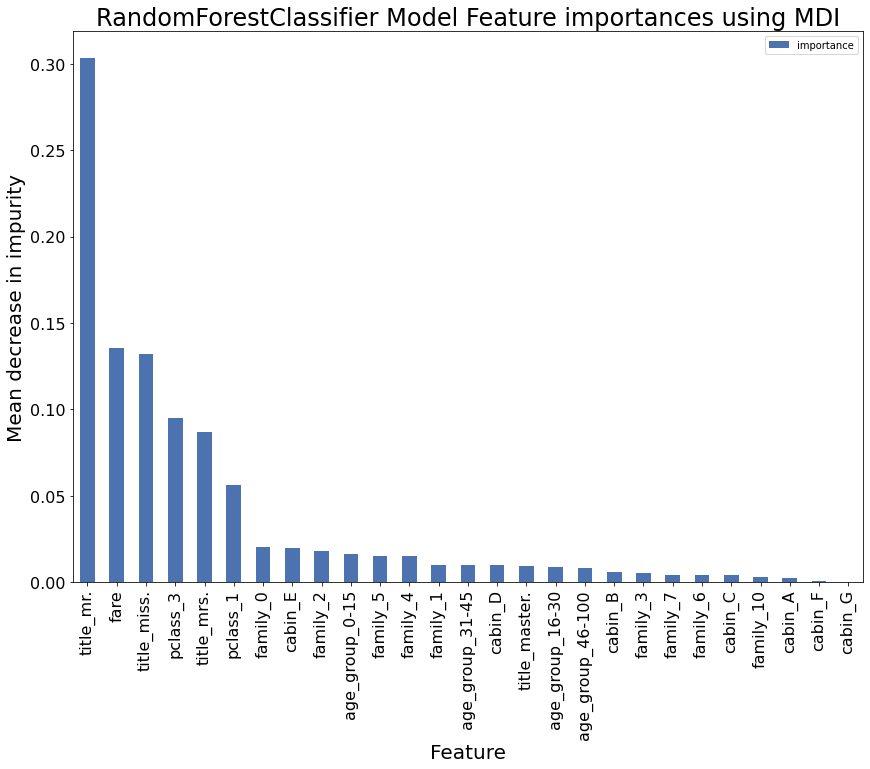

In [101]:
#run model with best chosen parameters
best_model = rf_random.best_estimator_
classification_prediction([best_model], X_train_st, X_test_st, y_train, y_test, proba_metrics= True)

<span style='font-family:sabon;font-size:13pt;'> We find that with these parameters we get a slight increase in the performance metrics. <br> We will try to achieve better results using fine tuning of the cross validation results. </span>

<a id='pred_cv'></a>
<h3>Grid Search with Cross Validation</h3>

In [102]:
#define parameter grid based on the randomized search and compare to our random grid
param_grid = rf_random.best_params_
display(param_grid, random_grid)

{'random_state': 42,
 'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

{'n_estimators': [200, 457, 714, 971, 1228, 1485, 1742, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 15, 26, 36, 47, 57, 68, 78, 89, 100, None],
 'min_samples_split': [2, 3, 5, 8],
 'min_samples_leaf': [1, 2, 3, 4, 5],
 'bootstrap': [True, False],
 'random_state': [42]}

<h4>1st Iteration</h4>

In [103]:
#define new testing parameters
param_grid['n_estimators'] = [150, 200, 300]
param_grid['max_features'] = ['auto']
param_grid['max_depth'] = [3, 5, 6, 7, 8,None]
param_grid['min_samples_split'] = [2,3]
param_grid['min_samples_leaf'] = [2,3,4]
param_grid['bootstrap'] = [False]
param_grid['random_state'] = [42]

In [104]:
# Create a based model
rf = RandomForestClassifier(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [105]:
# Fit the grid search to the data
grid_search.fit(X_train_st, y_train)
grid_search.best_params_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


{'bootstrap': False,
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200,
 'random_state': 42}

<h4>2nd Iteration</h4>

In [106]:
#update parameters
param_grid['n_estimators'] = [500]
param_grid['max_features'] = ['auto']
param_grid['max_depth'] = [7, 8,9,10]
param_grid['min_samples_split'] = [3]
param_grid['min_samples_leaf'] = [2]
param_grid['bootstrap'] = [False]
param_grid['random_state'] = [42]

In [107]:
# Create a based model
rf = RandomForestClassifier(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 6, n_jobs = -1, verbose = 2)

In [108]:
# Fit the grid search to the data
grid_search.fit(X_train_st, y_train)
grid_search.best_params_

Fitting 6 folds for each of 4 candidates, totalling 24 fits


{'bootstrap': False,
 'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 500,
 'random_state': 42}

<h4>Implement Tuned Parameters</h4>

In [109]:
#define model with chosen parameters
best_grid = grid_search.best_estimator_

Model: RandomForestClassifier

Accuracy: 0.85
Percision: 0.80
Recall: 0.76
F1 Score: 0.78
ROC AUC: 0.91


,importance
title_mr.,0.318178
title_miss.,0.138204
fare,0.111837
pclass_3,0.093462
title_mrs.,0.092811


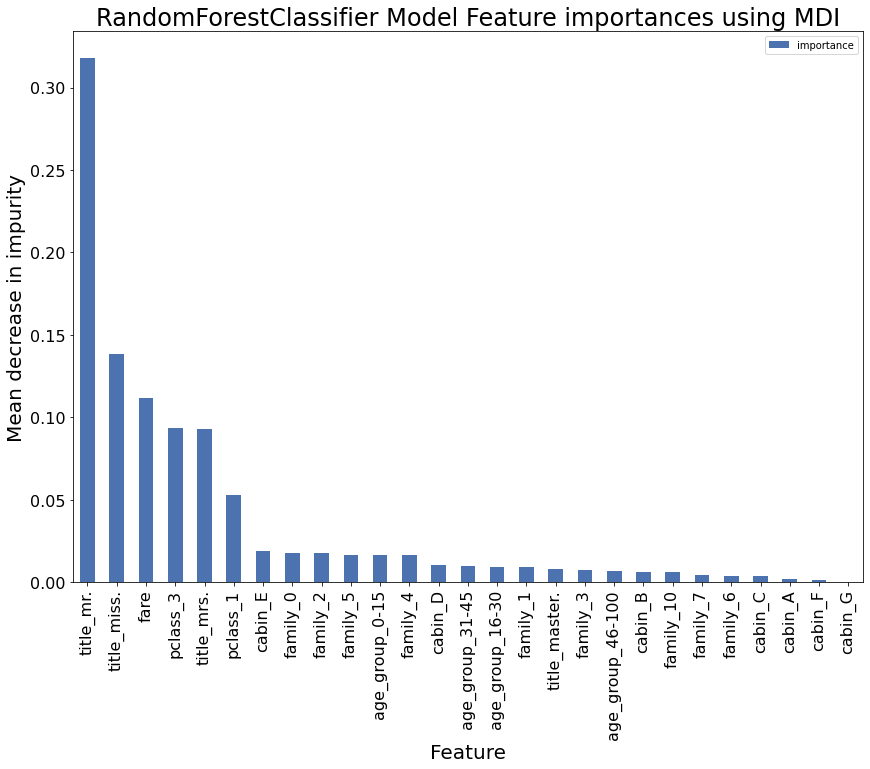

In [110]:
classification_prediction([best_grid], X_train_st, X_test_st, y_train, y_test, proba_metrics= True)

<a id='pred_finalmodel'></a>
<h3>Finalizing the Model</h3>

<span style='font-family:sabon;font-size:13pt;'> We'll train our model with the parameters we tuned. </span>

In [111]:
#define Training set
X = survive_train_onehot.drop('survived', axis=1)

#define testing set
y = survive_train_onehot['survived']

#split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

#scale data
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

In [112]:
#define model with parameters
rf_model = grid_search.best_estimator_

#train model
rf_model.fit(X_train_st, y_train)

RandomForestClassifier(bootstrap=False, max_depth=7, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=500, random_state=42)

<a id='pred_conc'></a>
<h3>Conclusion</h3>

<span style='font-family:sabon;font-size:13pt;'> We tested several classification algorithms using the sklearn library. <br> The algortihm that performed the best was the Random Forest Regressor. <br> We proceeded by tuning the algorithm's parameters using grid search cross validation and prepared the model for prediction. </span>

<a id='survival_pred'></a>
<h2>Predict Survivability</h2>

<a id='survival_prep'></a>
<h3>Prepare Data</h3>

In [113]:
#prepare the target data
test_data_predict = spread_df(
    clean_test_data,
    one_hot_encode= [
        'pclass',
        'family',
        'title',
        'cabin',
        'age_group'
    ]).drop(['cabin_NA', 'pclass_2'], axis=1)

In [138]:
display(test_data_predict.sample(), X.sample())

,fare,pclass_1,pclass_3,family_0,family_1,family_2,family_3,family_4,family_5,family_6,...,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,age_group_0-15,age_group_16-30,age_group_31-45,age_group_46-100
247,32,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


,fare,pclass_1,pclass_3,family_0,family_1,family_2,family_3,family_4,family_5,family_6,...,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,age_group_0-15,age_group_16-30,age_group_31-45,age_group_46-100
819,27,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


<span style='font-family:sabon;font-size:13pt;'> Great! we're ready to predict which individuals survived. </span>

<a id='survival_prediction'></a>
<h3>Prediction</h3>

In [114]:
#scale new data
new_data_predict = scaler.transform(test_data_predict)

#predict
prediction = rf_model.predict(new_data_predict)

#implement prediction
test_data['survived'] = prediction

<a id= 'survival_acc'></a>
<h3>Prediction Accuracy</h3>

<span style='font-family:sabon;font-size:13pt;'> We submitted the final prediction to the Kaggle competition and received the following result: </span>

<img src="submission_score_v1.jpg" alt="submission score">

<span style='font-family:sabon;font-size:13pt;'> So our model's accuracy is 78.7% <br> That's 329 passengers out of 418. </span>

<a id='final_conc'></a>
<h2>Final Conclusion</h2>

<span style='font-family:sabon;font-size:13pt;'> We were tasked with creating a model that can predict whether passengers of the titanic survived or not. <br> We received the relevant data, cleaned it for analysis, investigated the data features and tested various machine learning algorithms metrics. <br>
  <br> We found that the best algorithm to predict survivability in this instance appears to be Random Forest Classifier. <br> We determined that the factors present in the data that contribute most to the survivability classification are: <br>
  <ul>
    <b>
      <li>Gender</li>
      <li>Fare and ticket class</li>
    </b>
  </ul> And to a lesser extent: <ul>
    <b>
      <li>Number of family members on board</li>
      <li>Cabin location</li>
      <li>Age</li>
    </b>
  </ul> We proceeded in using cross validation grid search on the model's parameters to find the sweet spot that makes the best performance for our data. <br> Our grid search resulted in the following parameters for the Random Forest Classifier model: <br>
  <b>bootstrap=False, max_depth=7, min_samples_leaf=2, min_samples_split=3, n_estimators=500</b>
  <br>
  <br> Using these parameters, we were able to achieve a prediction with 78.7% accuracy.
</span>